In [1]:
import pandas as pd
import numpy
from matplotlib import pyplot as plt

In [2]:
df=pd.read_excel("Height-Width.xlsx")

**Data Analysis**

In [3]:
df.head()

,Height,Width
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [4]:
df.tail()

,Height,Width
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671
3500,72.738970,187.222909


In [5]:
df.head(10)

,Height,Width
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
5,67.253016,152.212156
6,68.785081,183.927889
7,68.348516,167.971111
8,67.018950,175.929440
9,63.456494,156.399676


In [6]:
df[20:40]

,Height,Width
20,67.915050,174.115929
21,69.439440,197.731422
22,66.149132,149.173566
23,75.205974,228.761781
24,67.893196,162.006652
25,68.144033,192.343977
26,69.089631,184.435174
27,72.800844,206.828189
28,67.421242,175.213922
29,68.496415,154.342639


In [7]:
df['Height'].head(10)

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796
5,67.253016
6,68.785081
7,68.348516
8,67.018950
9,63.456494


In [8]:
df.mean()

,0
Height,69.024411
Width,186.891258


In [10]:
df.Width.mean()

np.float64(186.891257979463)

In [11]:
df.describe()

,Height,Width
count,3501.000000,3501.000000
mean,69.024411,186.891258
std,2.858583,19.903132
min,59.380650,65.780000
25%,67.193523,173.896237
50%,69.044211,187.308370
75%,70.976491,200.356448
max,78.998742,269.989698


In [12]:
df.Height.std()

2.8585833281420983

In [13]:
df.shape

(3501, 2)

In [14]:
row, col= df.shape

In [15]:
row

3501

In [16]:
col

2

In [17]:
df.isnull()

,Height,Width
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
3496,False,False
3497,False,False
3498,False,False
3499,False,False


In [18]:
df.isnull().sum()

,0
Height,0
Width,0


In [19]:
x=df[['Height']]

In [20]:
x.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [23]:
y=df['Width']
y.head()

,Width
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


In [24]:
from sklearn.model_selection import train_test_split as tts

In [25]:
xtrain, xtest, ytrain, ytest =tts(x,y,test_size=0.3,random_state=45)

In [26]:
xtrain.head()

,Height
2257,69.346474
276,62.600248
1418,68.697461
1550,67.396020
2510,69.326189


In [27]:
xtest.head()

,Height
1971,67.671414
1750,74.604668
2564,70.171479
3114,71.954680
176,67.599424


In [28]:
ytrain.head()

,Width
2257,181.851584
276,151.720704
1418,178.015095
1550,180.659638
2510,177.363588


**Linear Regression**

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
reg = LinearRegression()

In [31]:
reg.fit(xtrain,ytrain)

LinearRegression()

In [32]:
m=reg.coef_

In [33]:
m

array([5.89957787])

In [34]:
c = reg.intercept_

In [35]:
c

np.float64(-220.18715695214868)

In [36]:
y=m*60+c
y

array([133.78751504])

In [37]:
reg.predict([[60]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([133.78751504])

In [38]:
reg.predict(xtest)

array([179.04561662, 219.94889141, 193.79494594, ..., 172.81690626,
       196.7531826 , 194.4356857 ])

In [39]:
pred=reg.predict(xtest)
pred

array([179.04561662, 219.94889141, 193.79494594, ..., 172.81690626,
       196.7531826 , 194.4356857 ])

In [40]:
df["Predicted result"] = reg.predict(x)

In [41]:
df.head()

,Height,Width,Predicted result
0,73.847017,241.893563,215.479070
1,68.781904,162.310473,185.597042
2,74.110105,212.740856,217.031180
3,71.730978,220.042470,202.995336
4,69.881796,206.349801,192.085939


In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [43]:
mse = mean_squared_error(ytest,pred)

In [44]:
mse

114.3447137997209

In [45]:
mae=mean_absolute_error(ytest,pred)
mae

8.033241997174171

**Best Fit Line**

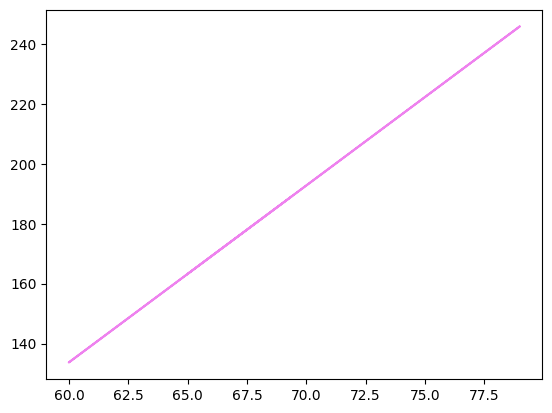

In [46]:
plt.plot(xtrain,reg.predict(xtrain),color="violet")

**Visualization**

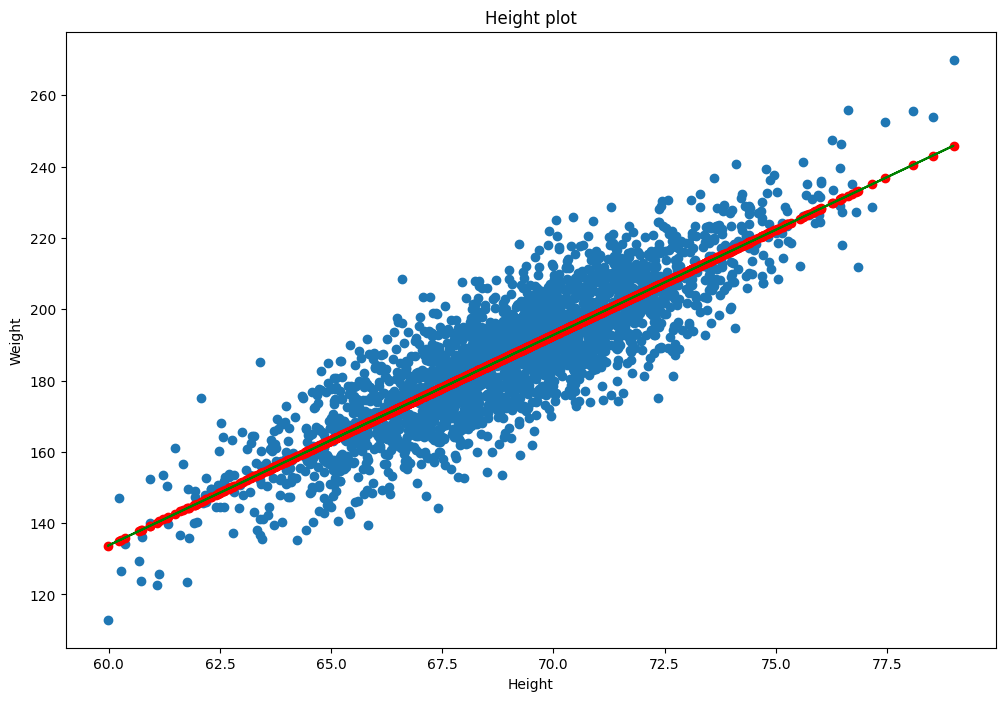

In [47]:
plt.figure(figsize=(12,8))
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Height plot")
plt.scatter(xtrain,ytrain)
plt.plot(xtrain,reg.predict(xtrain),color="green")
plt.scatter(xtrain,reg.predict(xtrain),color="red")

In [48]:
from sklearn.metrics import r2_score
r2_score(ytest,pred)

0.7285757231751436

In [49]:
xtest.to_csv("xtest.csv")

In [50]:
xtest.head()

,Height
1971,67.671414
1750,74.604668
2564,70.171479
3114,71.954680
176,67.599424


In [51]:
len(xtest)

1051

**Save Model**

In [52]:
import pickle as pk
import joblib as jb

In [53]:
pk.dump(reg,open("first","wb"))

In [54]:
reg2=pk.load(open("first","rb"))

In [55]:
reg2.predict([[73]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([210.4820273])

In [56]:
import warnings
warnings.filterwarnings("ignore")

In [57]:
jb.dump(reg,"second")

['second']